In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.compat import lzip
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.diagnostic as sm_diagnostic
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.style.use('seaborn-white')

In [2]:
# Data Generation 
N = 300
beta_vec = np.array([10, 5, -3])
x1 = np.linspace(start = 0, stop = 5, num = N)
x2 = np.random.choice(np.linspace(start = 3, stop = 17, num = 80), size = N, replace = True)
e  = np.random.normal(loc = 0, scale = list(range(1, N + 1)), size = N)
x_mat = sm.add_constant(np.column_stack((x1, x2)))
y = np.dot(x_mat, beta_vec) + e
data = pd.DataFrame(np.column_stack([y, x1, x2]), columns = ["y", "x1", "x2"])


In [3]:
# Regression coefficients (Ordinary Least Squares)
model = smf.ols(formula = "y ~ x1 + x2", data = data)
r = model.fit()
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.2426
Date:                Mon, 22 Aug 2022   Prob (F-statistic):              0.785
Time:                        22:20:44   Log-Likelihood:                -1979.4
No. Observations:                 300   AIC:                             3965.
Df Residuals:                     297   BIC:                             3976.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -20.2100     33.080     -0.611      0.5

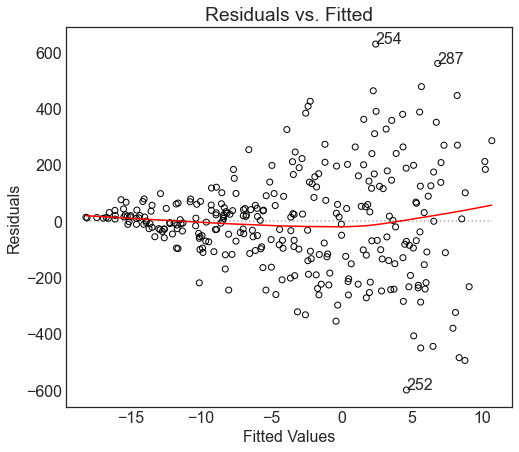

In [5]:
# Check Assumptions for Linear Regression 

# 1) Linearity 

#plot the residuals against the fitted values
residuals = r.resid
fitted = r.fittedvalues
smoothed = lowess(residuals,fitted)
top3 = abs(residuals).sort_values(ascending = False)[:3]
plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)
for i in top3.index:
    ax.annotate(i,xy=(fitted[i],residuals[i]))
plt.show()
# linearity seems to hold reasonably well, as the red line is close to the dashed line.

In [6]:
# 4) Check normality of error term 
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')
# The residual terms are pretty much normally distributed # 2) Mean Residual (Residual= Observed Value - Predicted value )
mean_residuals = np.mean(residuals)
print(mean_residuals)
# Very close to zero so all good here 

-9.284425080598642e-15


In [7]:
# 3) Check for Homoscedasticity (Apply Breusch–Pagan Test )
BP_t = sm_diagnostic.het_breuschpagan(resid = model.fit().resid, exog_het = model.exog)
print(pd.DataFrame(lzip(['LM statistic', 'p-value',  'F-value', 'F: p-value'], BP_t)))
# Since the p-value is lower than 0.05 so we could reject the null hypothesis. 
#The residuals are heteroskedastic.

              0             1
0  LM statistic  6.733925e+01
1       p-value  2.384891e-15
2       F-value  4.298051e+01
3    F: p-value  4.035327e-17


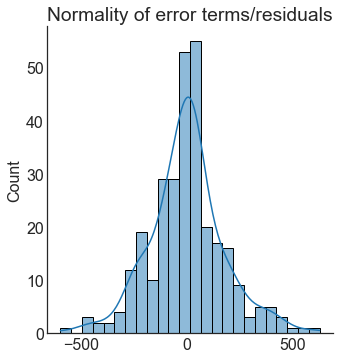

In [9]:
# 4) Check normality of error term 
p = sns.displot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')
# The residual terms are pretty much normally distributed 

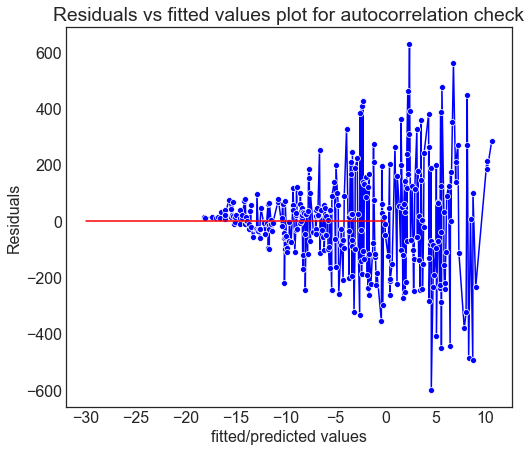

In [15]:
# 5) No autocorrelation of residuals 
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
p = sns.lineplot(fitted,residuals,marker='o',color='blue')
plt.xlabel('fitted/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([-30,0],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')
# error terms are not autocorrelated.

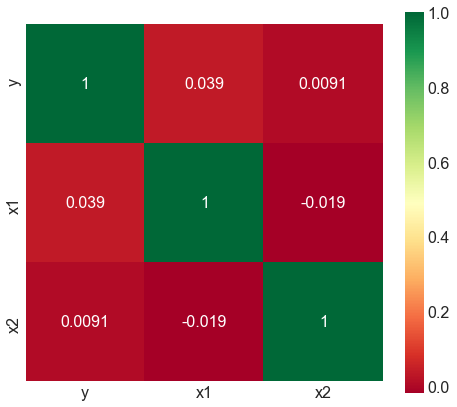

In [16]:
# 6) No perfect multicollinearity 
p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',square=True)
# This data doesn't contain perfect multicollinearity among independent variables
